## Python Fitvirus V2.5, with empericla phases by Dr. Batista

### Important notes
** "funcs.py" MUST be in the same folder as the "python_fitvirus.ipynb" notebook

** Requires installation of GEKKO package, installation instruction can be found here: https://github.com/BYU-PRISM/GEKKO

** passing [plot_on = False] will supress plot generation but it has to be done for each of the three type of plots

** master_plot boolean variable controls whether we can see the final plot with emperical phases or not

** master_plot's y axis is min-maxed normalized but has some sections HARDCODED which needs to be changed if you want to plot phase rectangles on either cumulative or rate of change dataset

In [1]:
# Load all modules, function definitions and important variable definitions
from funcs import *

## Get initial estimates using Eqn 11, 12 and 13 from pg 13

In [2]:
df = pd.read_csv("dataset.csv", header = 0)
master_plot = True # Controls whether we see the final master plot
# Need a preprocessing step here to make sure the first data has a value of 1

In [3]:
sampleC = df['cases'].values

# This is the naive assumption that on the first
# day we had a minimum case number of 1
if (sampleC[0] <= 0):
    df.at[0,'cases'] = 1

sampleC = df['cases'].values # Update sampleC again
print(sampleC[0]) # To test if we got the correct update

timestamp = df['idx'].values

1


In [4]:
# Estimate initial K, r and A
b0 = iniGuess(sampleC)

Total samples --> 65
Number of elements to consider for 3 equidistant point --> 33
k1 -- 0, k2 -- 32, k3 -- 64, m -- 31
Number of cases at chosen three points
k1 -- 1, k2 -- 397, k3 -- 670
p -- 265047
q -- 156939
r -- 0.22191032672433975
A -- 1043
Initial K value -- 670
Initial r value -- 0.22191032672433975
Initial A value -- 1043


## Nonlinear fit using GEKKO

In [5]:
# Function test
Kopt, ropt, Aopt =gekko_nonlinearfit(timestamp, sampleC, b0)
params = [Kopt,ropt,Aopt]

Regression parameters are K = 646.97570622, r = 0.135578461, A = 66.342732964


## Plot results, no phases

In [6]:
## Plot data vs predicted number of cases, no phases
fitted_cumu_cases = plot_cumulative_fit(params, sampleC, timestamp, plot_on=False)

In [7]:
# Compute R2 score for complete fit
r2score = r2_score(sampleC,fitted_cumu_cases)
print(f"R2 score for this nonliner fit is {round(r2score,3)}%")

R2 score for this nonliner fit is 0.987%


In [8]:
## Plot rate of change of cases
rate_change = plot_rate_change(params, sampleC, timestamp, plot_on= False)
print(len(rate_change))
#print(rate_change)

65


## Plot results with phases

(65,)


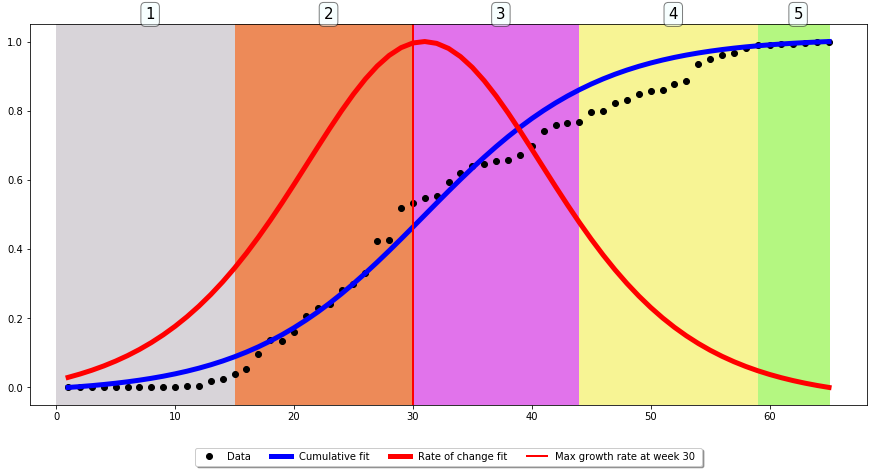

In [9]:
if (master_plot == True):
    plot_cumu_phases(params, timestamp, sampleC, fitted_cumu_cases, rate_change)